# Answer to Question 1 :
Reading the csv file using pandas and storing it in a dataframe

In [206]:
import pandas as pd
data = pd.read_csv("C:\\Users\\VISHAL\\Documents\\Case Studies_10K\\Datasets-20200307T133324Z-001\\Datasets\\Blackmore.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [133]:
# Checking the shape of the data (dimensions)
data.shape

# 945 rows and 4 columns

(945, 4)

In [134]:
data.head()

,subject,age,exercise,group
1,100,8.00,2.71,patient
2,100,10.00,1.94,patient
3,100,12.00,2.36,patient
4,100,14.00,1.54,patient
5,100,15.92,8.63,patient


# Answer to Question 2 :


The key objective of the case study is :
Model to determine the typical trajectory of exercise over time and does it differ b/w eating disordered and control subject groups

The response variable : exercise
The data collected in the given excel file is grouped under which data class : "Longitudinal or Panel Data"



# Answer to Question 3 :

In [135]:
data.describe()

,age,exercise
count,945.000000,945.000000
mean,11.441661,2.530646
std,2.765609,3.495086
min,8.000000,0.000000
25%,10.000000,0.400000
50%,12.000000,1.330000
75%,14.000000,3.040000
max,17.920000,29.960000


In [136]:
# Observations :
# The mean age of the subject is 11.44 years with min being 8 out of the 138 teenage girls
# For exercise : mean is 2.5 hrs.

In [137]:
data.dtypes
# Here : subject and group are objects whereas the rest are numeric

subject      object
age         float64
exercise    float64
group        object
dtype: object

# Answer to Question 4 :

Plotting a histogram for the variable 'Age'

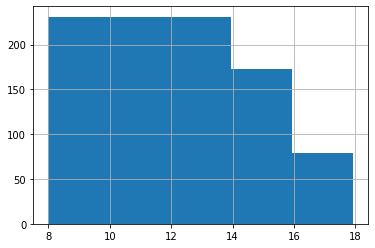

In [138]:
data.round({"age":0}) 
data['age'].hist(bins=5)

Observations :
Clearly seen, Age 8 is the min age to be kept as baseline in the model has max observations 
Age (8-12) has the maximum observations

# Answer to Question 5 :
Exercise Histories of Eating Disordered and Control Subjects

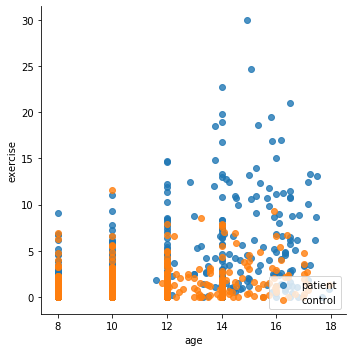

In [139]:
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="age", y="exercise", data=data, fit_reg=False, hue='group', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')


# Answer to Question 6 :

The scatterplot above shows an obvious peak in hours of exercise for both study groups at around age 15. 
These results may occur because of the start of high school around this age, which can push these young women to care more about their appearance to fit the societal perception of beauty. 
Their exercise hours increase as a result which endangers those who have already been diagnosed with an eating disorder.


# Answer to Question 7:

In [140]:
import pandas as pd
import os
import numpy as np
data= (
    data.assign(age=lambda df: np.floor(df['age']).astype('int')))


(data
   .head()
   .pipe(print))

  subject  age  exercise    group
1     100    8      2.71  patient
2     100   10      1.94  patient
3     100   12      2.36  patient
4     100   14      1.54  patient
5     100   15      8.63  patient


# Answer to Question 8 :

In [141]:
last_age = (
    data.sort_values(['subject', 'age'])
        .groupby('subject')
        .tail(1)
        .reset_index()
        )

mean_last_age_exercise = (
    last_age 
        .groupby(['group', 'age'])
        ['exercise']
        .mean()
        .reset_index()
        )

(mean_last_age_exercise
   .pipe(print))

      group  age  exercise
0   control   11  1.520000
1   control   12  1.730714
2   control   13  1.424545
3   control   14  2.381875
4   control   15  2.240588
5   control   16  2.505000
6   control   17  2.124444
7   patient   11  1.840000
8   patient   12  6.096000
9   patient   13  5.124211
10  patient   14  5.185667
11  patient   15  8.282857
12  patient   16  5.473488
13  patient   17  6.395000


# Answer to Question 9:

In [142]:
mean_last_age_exercise = (
    last_age 
        .groupby(['group', 'age'])
        ['exercise']
        .mean()
        .reset_index()
        .pivot(index='age', columns='group', values='exercise')
        )

(mean_last_age_exercise
   .pipe(print))

group   control   patient
age                      
11     1.520000  1.840000
12     1.730714  6.096000
13     1.424545  5.124211
14     2.381875  5.185667
15     2.240588  8.282857
16     2.505000  5.473488
17     2.124444  6.395000


# Answer to Question 10:

In [143]:
mean_last_age_exercise = (
    last_age 
        .groupby(['group', 'age'])
        .aggregate(
            {'exercise': ['mean', 'size']})
        .reset_index()
        .rename_axis(None, axis='index')
        )
print(mean_last_age_exercise.head())

flat_col = [t[0] if t[1] == '' else t[1] for t in
    mean_last_age_exercise.columns]
print(flat_col)

     group age  exercise     
                    mean size
0  control  11  1.520000    1
1  control  12  1.730714   14
2  control  13  1.424545   22
3  control  14  2.381875   16
4  control  15  2.240588   17
['group', 'age', 'mean', 'size']


In [144]:
mean_last_age_exercise.columns = flat_col
mean_last_age_exercise = (
    mean_last_age_exercise 
        .pivot(
            index='age',
            columns='group',
            values=['mean', 'size'])
        .reset_index()
        .rename_axis(None, axis='index')
        )
print(mean_last_age_exercise.head())

      age      mean              size        
group       control   patient control patient
0      11  1.520000  1.840000     1.0     1.0
1      12  1.730714  6.096000    14.0     5.0
2      13  1.424545  5.124211    22.0    19.0
3      14  2.381875  5.185667    16.0    30.0
4      15  2.240588  8.282857    17.0    28.0


In [145]:
flat_col = [ t[0] if t[1] == '' else t[1] + '-' + t[0] for t in
    mean_last_age_exercise.columns]
print(flat_col)

mean_last_age_exercise.columns = flat_col

(mean_last_age_exercise
   .pipe(print))

['age', 'control-mean', 'patient-mean', 'control-size', 'patient-size']
   age  control-mean  patient-mean  control-size  patient-size
0   11      1.520000      1.840000           1.0           1.0
1   12      1.730714      6.096000          14.0           5.0
2   13      1.424545      5.124211          22.0          19.0
3   14      2.381875      5.185667          16.0          30.0
4   15      2.240588      8.282857          17.0          28.0
5   16      2.505000      5.473488          14.0          43.0
6   17      2.124444      6.395000           9.0          12.0


# Answer to Question 11:

     group  age  size
0  control   11     1
1  control   12    14
2  control   13    22
3  control   14    16
4  control   15    17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4F1DD81C8>]],
      dtype=object)

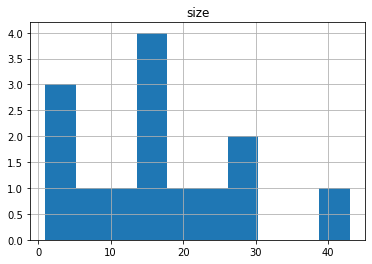

In [152]:
last_age_group_size = (
    last_age 
        .groupby(['group', 'age'])
        ['exercise']
        .size()
        .reset_index()
        .rename(columns={'exercise': 'size'})
        )
print(last_age_group_size.head())

last_age_group_size.hist('size')

# Answer to Question 12 :

In [153]:
mean_exercise = (
    data.groupby('group')
        ['exercise']
        .mean()
        .reset_index())

(mean_exercise
   .pipe(print))

     group  exercise
0  control  1.640641
1  patient  3.075887


# Answer to Question 13 :

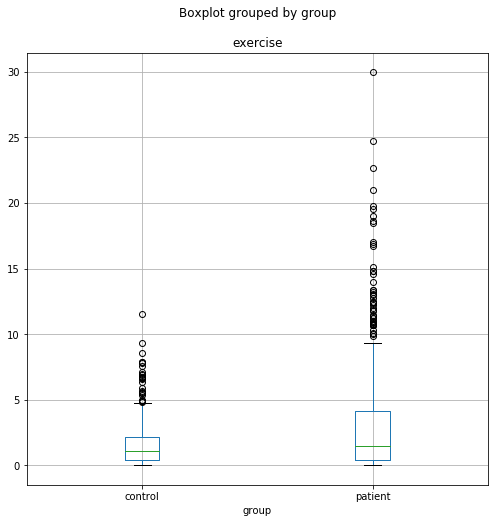

In [154]:
data.boxplot(column="exercise",        # Column to plot
                 by= "group",         # Column to split upon
                 figsize= (8,8))        # Figure size

# Answer to Question 14 :

Observations :
The hours of exercise per week for the anorexic patients vary from 0 to 30, with many results in the higher range. 
The hours of exercise per week for the control group vary from 0 to 12 with many results clumped in the 0 to 5 range. 
As shown in the above plot : the mean of the patients’ hours of exercise is 3.075887 while the control group’s is 1.640641.

From this data we can conclude: 
The hours of exercise for anorexic patients vary at much higher degrees than the hours for the control group and the hours of exercise peak at high school ages.

# Answer to Question 15:

In [161]:
new_df=data[['subject','group','exercise']]
new_df.head()

,subject,group,exercise
1,100,patient,2.71
2,100,patient,1.94
3,100,patient,2.36
4,100,patient,1.54
5,100,patient,8.63


In [170]:
data.head()

,subject,age,exercise,group
1,100,8,2.71,patient
2,100,10,1.94,patient
3,100,12,2.36,patient
4,100,14,1.54,patient
5,100,15,8.63,patient


# Answer to Question 16:

In [208]:
data['exercise_0'] = data['exercise'].apply(lambda x: 1 if x == 0 else 0)
data['exercise_0'].sum()

# There are 112 observations having 0 value in exercise

112

In [209]:
import math
data['exercise_log'] = np.log2(5/60 + data.exercise)
data.head()

,subject,age,exercise,group,exercise_log,exercise_0
1,100,8.00,2.71,patient,1.481988,0
2,100,10.00,1.94,patient,1.016734,0
3,100,12.00,2.36,patient,1.288851,0
4,100,14.00,1.54,patient,0.698959,0
5,100,15.92,8.63,patient,3.123225,0


# Answer to Question 17:

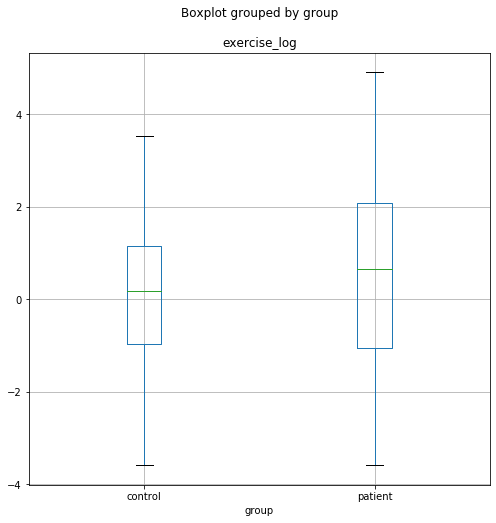

In [210]:
data.boxplot(column="exercise_log",        # Column to plot
                 by= "group",         # Column to split upon
                 figsize= (8,8))        # Figure size

Lot of outliers : were observed in the previous plot of exercise vs group box plot compared to the plot above there isn't any as we normalised the exercise variable by log
Here : as we see median of patient is higher than that of the control group

# Answer to Question 18:

The observations per subject is small. Hence, we should not be expecting very good estimates of the within subject regression coefficients by OLS  method.  
That’s why we go for the mixed models as they can provide the improved estimates of the within subjects ( Groups ) coefficients 
and the random effects by pooling information across subjects .

# Answer to Question 19:

In [213]:
#fit the model
mixed = smf.mixedlm("exercise_log ~ group * I(age - 8)", data, groups = data["group"], re_formula="~I(age - 8)")
mixed_fit = mixed.fit()
#print the summary
print(mixed_fit.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      exercise_log
No. Observations:       945          Method:                  REML        
No. Groups:             2            Scale:                   3.7303      
Min. group size:        359          Likelihood:              -1968.9061  
Max. group size:        586          Converged:               Yes         
Mean group size:        472.5                                             
--------------------------------------------------------------------------
                            Coef.    Std.Err.     z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                   -0.279        1.938 -0.144 0.886 -4.077  3.520
group[T.patient]            -0.316        2.739 -0.115 0.908 -5.685  5.052
I(age - 8)                   0.069        1.932  0.036 0.971 -3.717  3.856
group[T.patient]:I(age - 8)  0.210        2.

C:\Users\VISHAL\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2115: ConvergenceWarning:

The Hessian matrix at the estimated parameter values is not positive definite.



# Answer to Question 20:

There is a small, and marginally statistically significant, average age trend in the control group (represented by the fixed-effect coefficient for age - 8), and a highly significant interaction of
age with group, reflecting a much steeper average trend in the patient group. The small and non-significant coefficient for group indicates similar age-8 intercepts for the two groups